<a href="https://colab.research.google.com/github/fariz9980/MachineLearning_TK-42-G6/blob/main/t3_w5_pca_svd_boston_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Contoh PCA dan SVD menggunakan data Bostoon Housing dan MNIST

Source : https://www.youtube.com/watch?v=O3qXimMGn28 

Data : https://www.kaggle.com/prasadperera/the-boston-housing-dataset/notebook


In [1]:
!pip install panda

  Created wheel for panda: filename=panda-0.3.1-py3-none-any.whl size=7255 sha256=af1ea4791cb34f80e3cbdea1b8b20970fe9c2478e96794bc234a52ba4e8c63d7
  Stored in directory: /root/.cache/pip/wheels/e6/3d/81/a3665ce657d35359ca337b1db2975dbe5cd281a88b8982f6b6
Successfully built panda


In [2]:
!pip install numpy

In [3]:

#pca and svd
#check loss and accuracy
#max to 3 dim viz

import pandas as pd
import numpy as np

from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, TruncatedSVD
from matplotlib import pyplot as plt
# mnist ?

from sklearn.datasets import load_boston
boston = load_boston()


In [4]:
df_x = pd.DataFrame(boston.data, columns=boston.feature_names)
df_y = pd.DataFrame(boston.target)

df_x.describe

<bound method NDFrame.describe of         CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0    0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1    0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2    0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3    0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4    0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33
..       ...   ...    ...   ...    ...  ...  ...    ...      ...     ...    ...
501  0.06263   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  391.99   9.67
502  0.04527   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   9.08
503  0.06076   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   5.64
504  0.10959   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  393.45   6.48
505  0.04741   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   7.88

[506 

In [5]:
df_x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
df_y.head()

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [7]:
#put into classifier and get the accuracy

reg = linear_model.LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(df_x,df_y,test_size=0.2, random_state=4)
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
#check the accuracy
reg.score(x_test, y_test)

0.7263451459702528

In [9]:
#then dim rec using PCA
#from 18 col to 8 col

pca=PCA(n_components=8, whiten='True')
x=pca.fit(df_x).transform(df_x)


In [10]:
df_x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
pca.explained_variance_ 

array([3.08899113e+04, 6.25033006e+03, 8.18363958e+02, 2.66684838e+02,
       4.98315275e+01, 2.78767934e+01, 1.60633859e+01, 9.52731770e+00])

In [12]:
#put again after DIM REDUCTION into classifier and get the accuracy

reg = linear_model.LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x,df_y,test_size=0.2, random_state=4)
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
reg.score(x_test, y_test) #accuracy

0.6317524641284353

In [14]:
#do again with SVD 
svd = TruncatedSVD(n_components = 10)
x = svd.fit(df_x).transform(df_x)
reg = linear_model.LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x,df_y,test_size=0.2, random_state=4)
reg.fit(x_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
reg.score(x_test, y_test) #accuracy

0.6822252753655194

In [16]:

#see the covariance matrix
df_x.corr  

<bound method DataFrame.corr of         CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0    0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1    0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2    0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3    0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4    0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33
..       ...   ...    ...   ...    ...  ...  ...    ...      ...     ...    ...
501  0.06263   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  391.99   9.67
502  0.04527   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   9.08
503  0.06076   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   5.64
504  0.10959   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  393.45   6.48
505  0.04741   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   7.88

[506 ro

In [23]:
# file_path = '/content/mnist_train.csv' 
# data = pd.read_csv(file_path, "mnist_train.csv")
data = pd.read_csv("/content/mnist_train.csv")
# silakan ambil data dengan cara yang lain, atau letakkan pada struktur folder di Google Drive yang sama

In [25]:
data.describe
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147.0,252.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
df_x = data.iloc[:,:1]
df_y = data.iloc[:,0]

In [26]:
x_train, x_test, y_train, y_test = train_test_split(df_x,df_y,test_size=0.2, random_state=4)
rf = RandomForestClassifier(n_estimators=50)
rf.fit(x_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [27]:

pred = rf.predict(x_test)

In [28]:
s = y_test.values
count = 0
for i in range(len(pred)):
	if pred[i]==s[i]:
		count = count+1

In [29]:
count/float(len(pred))

1.0

In [ ]:
pca = PCA(n_components=10, whiten='True') 
x  = pca.fit(df_x).transform(df_x)

x_train, x_test, y_train, y_test = train_test_split(x,df_y,test_size=0.2, random_state=4)
rf = RandomForestClassifier(n_estimators=50)
rf.fit(x_train, y_train)
pred = rf.predict(x_test)
s = y_test.values
count = 0
for i in range(len(pred)):
	if pred[i]==s[i]:
		count = count+1

In [42]:
count/float(len(pred))

1.0

In [ ]:
#Prepare to viz MNIST with PCA in 2 dimensions
pca=PCA(n_components=2, whiten='True')
x=pca.fit(df_x).transform(df_x)

x_train, x_test, y_train, y_test = train_test_split(x,df_y,test_size=0.2, random_state=4)
rf = RandomForestClassifier(n_estimators=50)
rf.fit(x_train, y_train)

pred = rf.predict(x_test)
s = y.test.values
count = 0
for i in range(len(pred)):
	if pred[i]==s[i]:
		count = count+1



In [37]:
#check the accuracy first
count/float(len(pred))

1.0

IndexError: ignored

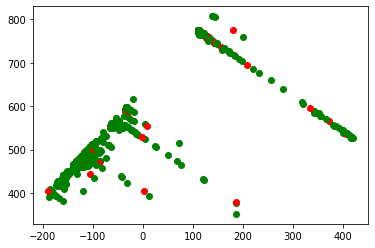

In [45]:
#Lets viz MNIST with PCA in 2 dimensions
y=df_y.values
for i in range(5000):
	if y[i]==0:
	   plt.scatter(x[i,1],x[i,0],c='r')
	else:
	   plt.scatter(x[i,1],x[i,0],c='g')
plt.show()
